<a href="https://colab.research.google.com/github/YashJain24-chief/Image-processing-for-edge-detection/blob/main/AveragePooling_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Yash Jain | ID: 20181COM0185 | Sec: 6COM3 | Sub: Introduction to deep learning

<b>What is Average Pooling?</b><br>
Average pooling involves calculating the average for each patch of the feature map. While max pooling gives the most prominent feature in a particular patch of the feature map, average pooling gives the average of features present in a patch.

Average pooling is mainly used in image/video processing. 


<b>Importing required modules</b>

In [ ]:
from keras.layers import Convolution2D, AveragePooling2D, Activation
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.
*   Convolution2D, AveragePooling2D are used to implement Convolution and Averagepooling in two dimensions.
*   Sequential is used to build models as a simple stack of layers.
*   cv2 is used for handling file operations.





<b>Reading an image</b>

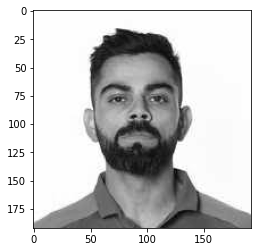

In [ ]:
img= cv2.imread("/content/projectImage.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

*   <b>cv2.IMREAD_GRAYSCALE</b> is used to convert a coloured image into a GrayScale image.
*   <b>cmap</b> also called as colormap is used to set color of the outputPlot/image. 






In [ ]:
img.shape

(192, 192)


*   <b>.shape</b> function is used to check the dimension of the dataset(in this case, an image)




In [ ]:
img_batch=img.reshape(1,img.shape[0],img.shape[1],1)
img_batch.shape

(1, 192, 192, 1)

The reshape() function is used to give a new shape to an array without changing its data.

Here the dimension of the array is reshaped so as to pass the image in the form of batches. Keras expects batches of images, so we have to add a dimension to trick it into a batch.

*   1st parameter in reshape represents the batches(in this case we are passing only 1 image)
*   img.shape[0],img.shape[1] represents the dimesion/shape of the image
*   4th parameter represents that the image is a grayScale image(in case of a RGB image pass 3)






In [ ]:
model1=Sequential()
model1.add(Convolution2D(1, (15,15), padding= 'valid', input_shape=img_batch.shape[1:]))
#random weights are initialized
#stride is not passed, so default value is 1
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 1)       226       
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________




*   .add() function is used to add layers to the model, and as we know that first layer is a convolution layer, we'll be adding that to our model.
*   In Convolution2D function:
  *   the 1st parameter represents the number of filters that we want to use in our convolution layer
  *   the 2nd parameter represents the filter size.
  *   the 3rd parameter represents padding. In our case 'valid padding' means we are not providing any padding to the image and the image size will be reduced
  *   the 4th paramter shows the input size that we are passing to the convolution layer
*   Here we are not defining the weights externally for the filters, random weights will be assigned during backpropagation process.
*   .summary() function is used to show the kind of layers we have implemented/used for our model.

The original size of the image was 192x192x1. After passing the image through the convolution layer, the size of the image reduced to 178x178x1. The output dimension of the image(nxn) with filter and stride=1 is given by <b>((n-f+1)+(n-f+1))</b>








In [ ]:
conv_img=model1.predict(img_batch)
conv_img.shape

(1, 178, 178, 1)

.predict() generates output predictions for the input samples.
Computation is done in batches. 

[[521.793   521.793   521.793   ... 521.793   521.793   521.793  ]
 [521.793   521.793   521.793   ... 521.793   521.793   521.793  ]
 [521.793   521.793   521.793   ... 521.793   521.793   521.793  ]
 ...
 [370.64865 370.6059  371.05246 ... 327.29465 329.17755 337.97162]
 [370.37335 369.73853 365.0569  ... 316.134   310.49747 314.05655]
 [369.11493 358.12634 339.60022 ... 304.2791  301.83502 301.4654 ]]


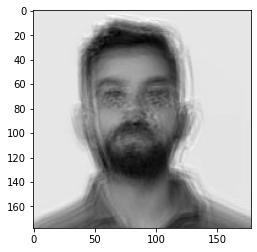

In [ ]:
conv_img_show=conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show,cmap='gray')
plt.show()

This piece of code is to check the output of the image after passing through convolution layer. As we can notice, the image is pretty much blurred, this is because of the negative values present in the matrix. In the next step we'll be using "Relu" activation function to get rid of negative values and replace it with 0.

<b>Adding relu unit</b>

[[37.654198 37.654198 37.654198 ... 37.654198 37.654198 37.654198]
 [37.654198 37.654198 37.654198 ... 37.654198 37.654198 37.654198]
 [37.654198 37.654198 37.654198 ... 37.654198 37.654198 37.654198]
 ...
 [63.227943 65.44354  74.531876 ... 60.87005  57.468437 74.725815]
 [70.434265 70.38734  58.120045 ... 41.33204  53.460743 66.17944 ]
 [59.69439  58.486973 55.673576 ... 18.237047 38.938255 52.640133]]


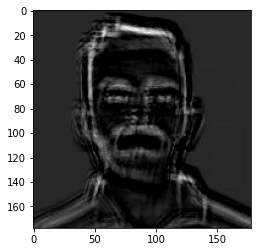

In [ ]:
model2=Sequential()
model2.add(Convolution2D(1, (15,15), padding= 'valid', input_shape=img_batch.shape[1:]))
model2.add(Activation('relu'))
#random weights are initialized
#stride is not passed, so default value is 1

conv_img=model2.predict(img_batch)
conv_img_show=conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show,cmap='gray')
plt.show()

After adding relu, we notice that the image got darkend as we removed the negative values.

<b>Adding average pooling operation</b> 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.19351006 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.3863287  ... 0.         0.         0.        ]]


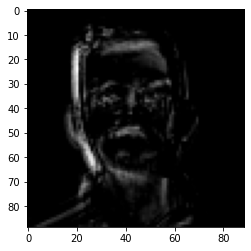

In [ ]:
model3=Sequential()
model3.add(Convolution2D(1, (15,15), padding= 'valid', input_shape=img_batch.shape[1:]))
model3.add(Activation('relu'))
model3.add(AveragePooling2D(pool_size=(2,2)))
#random weights are initialized
#stride is not passed, so default value is 1

conv_img=model3.predict(img_batch)
conv_img_show=conv_img.reshape(conv_img.shape[1],conv_img.shape[2])
print(conv_img_show)
plt.imshow(conv_img_show,cmap='gray')
plt.show()

After adding a pooling layer, we notice that the dominating features are still being retained by the model. The obtained output is a feature map which can further be processed to obtain more complex feature maps using softmax, which will further be helpful for classifying different images or objects.

<b>Conclusion</b>

This is a simple implementation of Edge detection using CNN techniques. Edge detection techniques are generally used for finding discontinuities in gray level images. Edge detection has many applications in today's world. For example:

*   At present, finger print recognition is being used widely in mobile phones. Edge detection techniques enhance the quality of image and cause the improvement in the image recognition.

We cannot say that a particular pooling method is better over other generally. The choice of pooling operation is made based on the data at hand. 

<b>Advantage:</b>  The use of average pooling encourages the network to identify the complete extent of the object. Max pooling rejects a big chunk of data and retains at max 1/4th. Average pooling on the other hand, do not reject all of it and retains more information. This is what usually believed to lead to better results.

<b>Disadvantage:</b>  Average pooling brings all the features into count and flows it to next layer which means all values actually are used for feature mapping and creating output - which is a very generalized computation. If you don’t need all inputs from Conv layer, you will get bad accuracy for average pooling.


